In [112]:
import pandas as pd
import metnum
import numpy as np
import utils
import seaborn as sns
import matplotlib.pyplot as plt

df_completo = pd.read_csv('../data/train.csv')
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          240000 non-null  int64  
 1   titulo                      234613 non-null  object 
 2   descripcion                 238381 non-null  object 
 3   tipodepropiedad             239954 non-null  object 
 4   direccion                   186928 non-null  object 
 5   ciudad                      239628 non-null  object 
 6   provincia                   239845 non-null  object 
 7   antiguedad                  196445 non-null  float64
 8   habitaciones                217529 non-null  float64
 9   garages                     202235 non-null  float64
 10  banos                       213779 non-null  float64
 11  metroscubiertos             222600 non-null  float64
 12  metrostotales               188533 non-null  float64
 13  idzona        

Intento predecir la cantidad de baños de acuerdo a los Metros totales y la antiguedad

In [113]:
propGroup = 'ciudad'
groups = [
    'Querétaro',
    'Benito Juárez',
    'Zapopan',
    'San Luis Potosí'
]

props = [
    'metrostotales', 
    'antiguedad'
]
phis = [ 
        lambda x: x, #metros2
        lambda x: (1/(x+1)), #antiguo
]
pred = 'banos'

In [114]:
utils.precisionPorGrupos(df_completo, props, groups, propGroup, phis, pred)

Error de precision para Querétaro es de 0.24096169871911652
Error de precision para Benito Juárez es de 0.26651759334996417
Error de precision para Zapopan es de 0.26684408287264566
Error de precision para San Luis Potosí es de 0.25340600475426245


Intento predecir la cantidad de piscinas de acuerdo a la latitud

In [115]:
props = [
    'lat'
]
pred = 'piscina'

No tiene sentido ver latitudes en la misma ciudad, asi que vamos a agrupar por tipos de propiedades en las cuales haya propiedades con piscina

In [116]:
df_completo[df_completo['piscina'] > 0]['tipodepropiedad'].value_counts()

Casa                       9109
Apartamento                8095
Casa en condominio         2973
Terreno                     489
Villa                       145
Quinta Vacacional           116
Departamento Compartido      26
Rancho                       14
Terreno comercial             2
Oficina comercial             1
Edificio                      1
Name: tipodepropiedad, dtype: int64

Elijo las primeras 6

In [117]:
propGroup = 'tipodepropiedad'
groups = [
    'Casa',
    'Apartamento',
    'Casa en condominio',
    'Terreno',
    'Villa',
    'Quinta Vacacional'
]

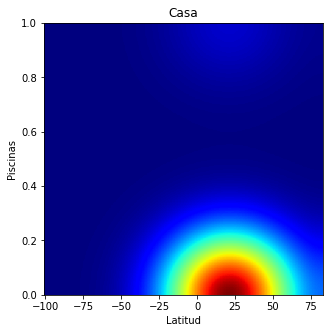

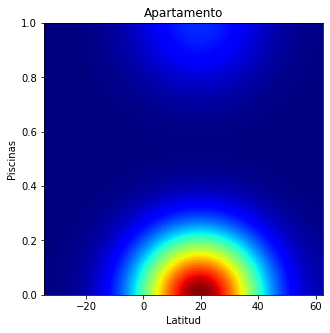

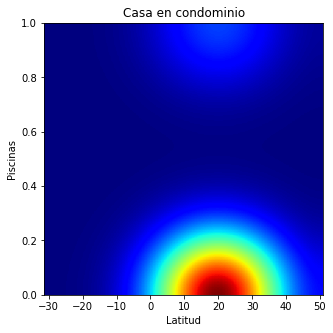

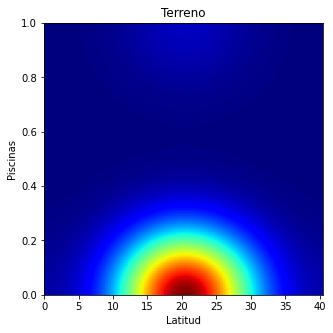

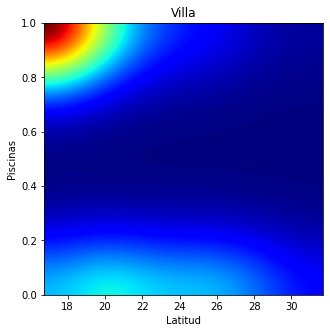

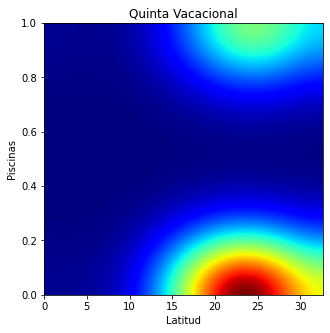

In [118]:
for i in range(len(groups)):
    df_group = df_completo[df_completo[propGroup]==groups[i]]
    fData = utils.filterData(df_group, props, pred)
    utils.showHeatMap(fData['lat'], fData[pred], 'Latitud', 'Piscinas', groups[i])

In [119]:
phis = [ 
        lambda x: x/20, #latitud
]

In [120]:
utils.precisionPorGrupos(df_completo, props, groups, propGroup, phis, pred)

Error de precision para Casa es de 0.17097615479348302
Error de precision para Apartamento es de 0.24609914331689373
Error de precision para Casa en condominio es de 0.2553964234874474
Error de precision para Terreno es de 0.15536836180376642
Error de precision para Villa es de 0.3794707941507254
Error de precision para Quinta Vacacional es de 0.33135874752639255


Intento mejorarlo agregando la longitud

In [121]:
props = [
    'lat',
    'lng'
]

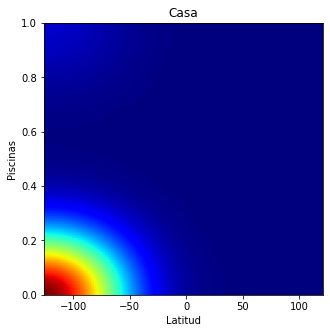

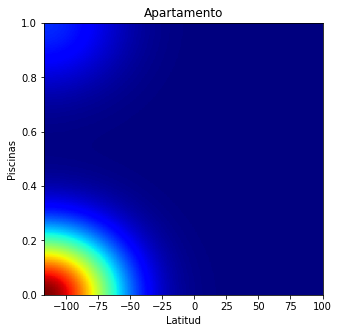

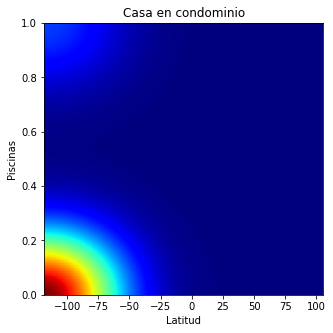

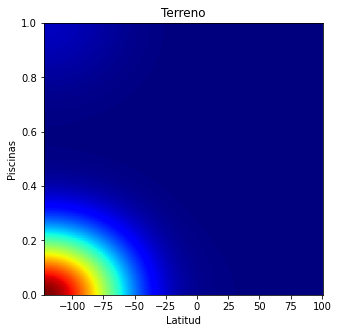

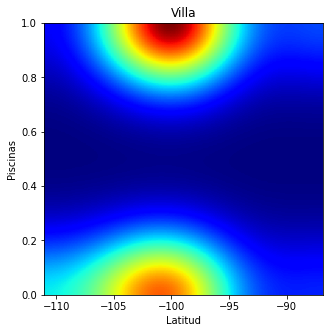

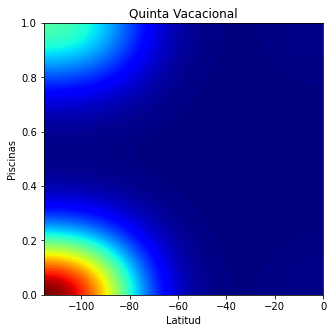

In [122]:
for i in range(len(groups)):
    df_group = df_completo[df_completo[propGroup]==groups[i]]
    fData = utils.filterData(df_group, props, pred)
    utils.showHeatMap(fData['lng'], fData[pred], 'Latitud', 'Piscinas', groups[i])

In [123]:
phis = [ 
        lambda x: x/20, #latitud
        lambda x: x + 100, #longitud
]

In [124]:
utils.precisionPorGrupos(df_completo, props, groups, propGroup, phis, pred)

Error de precision para Casa es de 0.17077415935443288
Error de precision para Apartamento es de 0.2459705397405668
Error de precision para Casa en condominio es de 0.25537302326041467
Error de precision para Terreno es de 0.15538022197985638
Error de precision para Villa es de 0.37207271157479643
Error de precision para Quinta Vacacional es de 0.32884403614777363


In [125]:
df_completo['metrosdescubiertos'] = df_completo['metrostotales'] - df_completo['metroscubiertos']
props = [
    'lat',
    'lng',
    'metrosdescubiertos'
]
phis = [ 
        lambda x: x/20, #latitud
        lambda x: x, #longitud
        lambda x: x**2
]
utils.precisionPorGrupos(df_completo, props, groups, propGroup, phis, pred)

Error de precision para Casa es de 0.15713743386592746
Error de precision para Apartamento es de 0.2415757367865207
Error de precision para Casa en condominio es de 0.2502312166399067
Error de precision para Terreno es de 0.15820492370585063
Error de precision para Villa es de 0.2582164337027056
Error de precision para Quinta Vacacional es de 0.3127279914996868


In [126]:
df_completo['metrosdescubiertos'] = df_completo['metrostotales'] - df_completo['metroscubiertos']
props = [
    'lat',
    'lng',
    'metrostotales',
    'metroscubiertos'
]
phis = [ 
        lambda x: x/20, #latitud
        lambda x: x, #longitud
        lambda x: x**2,
        lambda x: np.sqrt(x)
]
utils.precisionPorGrupos(df_completo, props, groups, propGroup, phis, pred)

Error de precision para Casa es de 0.15628959411841997
Error de precision para Apartamento es de 0.23166126855972446
Error de precision para Casa en condominio es de 0.2499877779002784
Error de precision para Terreno es de 0.15817568325393516
Error de precision para Villa es de 0.27412074321693863
Error de precision para Quinta Vacacional es de 0.37108752812665285


In [129]:
utils.precisionPorGrupos(df_completo, props, groups, propGroup, phis, pred, validation=utils.RMSE)

Error de precision para Casa es de 0.22431392802870542
Error de precision para Apartamento es de 0.3307761364738574
Error de precision para Casa en condominio es de 0.3568302210130881
Error de precision para Terreno es de 0.2268680716415189
Error de precision para Villa es de 0.39865396321272867
Error de precision para Quinta Vacacional es de 0.5198340542497554


Ver si por ahi meter mapa con las latitudes donde caen

No se puede predecir la antiguedad por la ciudad y zona porque son datos categoricos

In [127]:
df_completo[['ciudad', 'idzona']]

,ciudad,idzona
0,Benito Juárez,23533.0
1,La Magdalena Contreras,24514.0
2,Tonalá,48551.0
3,Zinacantepec,53666.0
4,Zapopan,47835.0
...,...,...
239995,Zinacantepec,53666.0
239996,Toluca,51954.0
239997,Benito Juárez,50003995.0
239998,Iztapalapa,24162.0


In [128]:
import folium
from folium import plugins

In [133]:
df_propiedad = df_completo[df_completo['tipodepropiedad'].isin(groups)]
df_propiedad = utils.filterData(df_propiedad, props)

In [137]:
coordinates = df_propiedad[df_propiedad['piscina'] == 0][['lat', 'lng']]

coordinates.reset_index()
m = folium.Map(coordinates.iloc[0].to_numpy(), zoom_start=11)

# plot heatmap
m.add_child(plugins.HeatMap(coordinates, radius=15))
m

In [138]:
coordinates = df_propiedad[df_propiedad['piscina'] == 1][['lat', 'lng']]

coordinates.reset_index()
m = folium.Map(coordinates.iloc[0].to_numpy(), zoom_start=11)

# plot heatmap
m.add_child(plugins.HeatMap(coordinates, radius=15))
m